In [30]:
import numpy as np
import matplotlib.pyplot as plt
import myFunctions as fct
import seaborn as sns
import pandas as pd
from scipy import stats

def test_mean(data, null_value):
    """
    Perform a one-sample t-test to test if the mean of the data differs significantly from the null_value.

    Parameters:
    data (array-like): The sample data.
    null_value (float): The null value or range to compare the mean against.
    alpha (float): The significance level for the test.

    Returns:
    bool: True if the mean falls outside the interval, False otherwise.
    """
    t_statistic, p_value = stats.ttest_1samp(data, null_value)

    return t_statistic, p_value

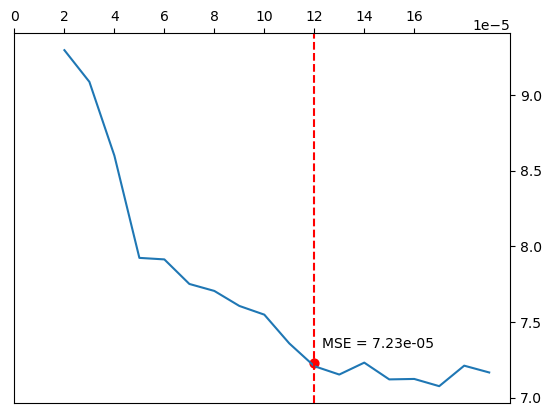

In [31]:
data = fct.import_mat('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/KFOLD_validation/validation_mse_final', 'validation_MSE')
time = np.array(range(2, 20))
x_ticks = range(0,18,2)

fig, ax  = plt.subplots()
ax.scatter(x = 12, y = data[0, 12], c = 'r', s = 40)
ax.plot(time, data[0])
plt.xticks(ticks = x_ticks)
plt.axvline(x = 12, c = 'r', linestyle = '--')
ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.annotate('MSE = ' + str(np.round(data[0, 12], 7)), (12+0.3, data[0, 12]+0.000001))
#plt.savefig('Encoding.jpg', dpi = 500)
#ax.ticklabel_format(style = 'plain')
plt.show()

## data.shape

In [32]:
223/400

0.5575

In [33]:
from scipy.stats import binom

def probability_of_k_or_more_correct(k, n, p):
    """
    Calculate the probability of getting k or more correct events out of n total events.

    Parameters:
    k (int): Number of correct events.
    n (int): Total number of events.
    p (float): Probability of classifying an event as correct.

    Returns:
    float: Probability of getting k or more correct events.
    """
    # Calculate the probability using the binomial cumulative distribution function (CDF)
    probability = 1 - binom.cdf(k - 1, n, p)

    return probability

# Example usage
k = 177  # Number of correct events
n = 300  # Total number of events
p = 0.5  # Probability of classifying an event as correct

result = probability_of_k_or_more_correct(k, n, p)
print(f"The probability of getting {k} or more correct events out of {n} is {result:.4f}")


The probability of getting 177 or more correct events out of 300 is 0.0011


In [34]:
from scipy.stats import binom

def find_99th_percentile(n, p):
    """
    Find the 99th percentile of the probability distribution.

    Parameters:
    n (int): Total number of events.
    p (float): Probability of classifying an event as correct.

    Returns:
    int: Number of correct events at the 99th percentile.
    """
    # Calculate the 99th percentile using the binomial inverse CDF (ppf)
    percentile = binom.ppf(0.95, n, p)

    return percentile

# Example usage
n = 100  # Total number of events
p = 0.5  # Probability of classifying an event as correct

result = find_99th_percentile(n, p)
print(f"The 99th percentile of the probability distribution is {result}")


The 99th percentile of the probability distribution is 58.0


In [35]:


BP_vs_CTRL = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_BPinBPvsCTRL_classification_accuracy.npy') 
BP_vs_SCZ = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_BPinBPvsSCZ_classification_accuracy.npy') 
BP_vs_ADHD = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_BPinBPvsADHD_classification_accuracy.npy') 


SCZ_vs_CTRL = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_SCZinSCZvsCTRL_classification_accuracy.npy') 
SCZ_vs_BP = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_SCZinBPvsSCZ_classification_accuracy.npy') 
SCZ_vs_ADHD = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_SCZinSCZvsADHD_classification_accuracy.npy') 

ADHD_vs_CTRL = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_ADHDinADHDvsCTRL_classification_accuracy.npy') 
ADHD_vs_BP = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_ADHDinBPvsADHD_classification_accuracy.npy') 
ADHD_vs_SCZ = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_ADHDinSCZvsADHD_classification_accuracy.npy') 

CTRL_vs_BP = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_CTRLinBPvsCTRL_classification_accuracy.npy') 
CTRL_vs_ADHD = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_CTRLinADHDvsCTRL_classification_accuracy.npy') 
CTRL_vs_SCZ = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_CTRLinSCZvsCTRL_classification_accuracy (2).npy') 


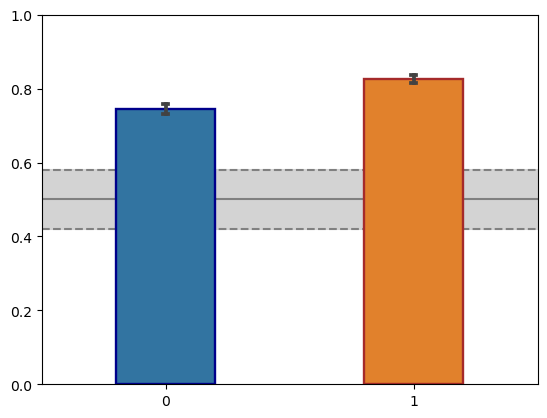

3.7678302477737085e-13
2.905589419088978e-69


In [36]:
max_v = 580
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [CTRL_vs_BP,BP_vs_CTRL], zorder = 1, capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
plt.savefig('RF_CTRL_vs_BP.jpg', dpi = 1800)
plt.show()


data = CTRL_vs_SCZ  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)


data = BP_vs_CTRL  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)

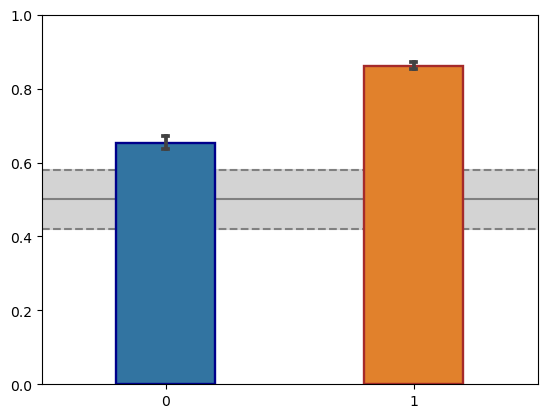

3.7678302477737085e-13
1.4524816860227096e-81
0.8622000000000001


In [37]:
max_v = 580
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [CTRL_vs_SCZ,SCZ_vs_CTRL], zorder = 1 ,capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
plt.savefig('RF_CTRL_vs_SCZ.jpg', dpi = 1800)
plt.show()

data = CTRL_vs_SCZ  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)


data = SCZ_vs_CTRL  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)

print(np.mean(SCZ_vs_CTRL))

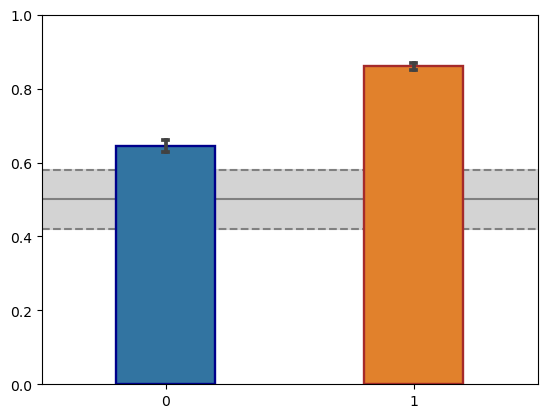

8.07680708475383e-12
4.94725277316024e-76
0.8607500000000001


In [38]:
max_v = 580
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [CTRL_vs_ADHD,ADHD_vs_CTRL], zorder = 1, capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
plt.savefig('RF_CTRL_vs_ADHD.jpg', dpi = 1800)
plt.show()

CTRL_vs_ADHD = CTRL_vs_ADHD[~np.isnan(CTRL_vs_ADHD)]
data = CTRL_vs_ADHD  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)


data = ADHD_vs_CTRL  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)
print(np.mean(ADHD_vs_CTRL))

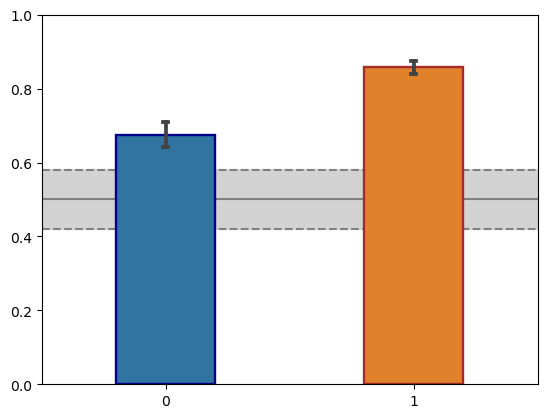

8.133019611243034e-07
1.5086009837181025e-50


In [39]:
max_v = 580
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [BP_vs_SCZ, SCZ_vs_BP], zorder = 1, capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
plt.savefig('RF_BP_vs_SCZ.jpg', dpi = 1800)
plt.show()

BP_vs_SCZ = BP_vs_SCZ[~np.isnan(BP_vs_SCZ)]
data = BP_vs_SCZ  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)


SCZ_vs_BP = SCZ_vs_BP[~np.isnan(SCZ_vs_BP)]
data = SCZ_vs_BP  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)

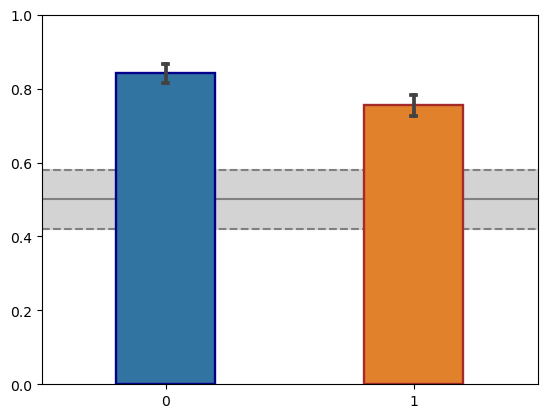

2.8326132512969955e-34
0.8427784992784992
4.428294619305811e-21


In [40]:
max_v = 580
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [BP_vs_ADHD, ADHD_vs_BP], zorder = 1, capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
plt.savefig('RF_BP_vs_ADHD.jpg', dpi = 1800)
plt.show()

BP_vs_ADHD = BP_vs_ADHD[~np.isnan(BP_vs_ADHD)]
data = BP_vs_ADHD 
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)
print(np.mean(BP_vs_ADHD))


data = ADHD_vs_BP  
null_value = 0.580  
ttest, p_value = test_mean(data, null_value)
print(p_value)

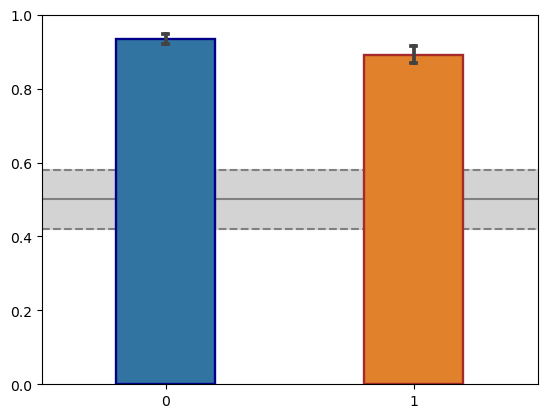

4.618059604874783e-72
0.9339204684204684
2.1264192146155697e-47


In [41]:
max_v = 580
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [SCZ_vs_ADHD, ADHD_vs_SCZ], zorder = 1, capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
plt.savefig('RF_SCZ_vs_ADHD.jpg', dpi = 1800)
plt.show()

SCZ_vs_ADHD = SCZ_vs_ADHD[~np.isnan(SCZ_vs_ADHD)]
data = SCZ_vs_ADHD  
null_value = 0.580 
ttest, p_value = test_mean(data, null_value)
print(p_value)
print(np.mean(SCZ_vs_ADHD))


data = ADHD_vs_SCZ  
null_value = 0.580 
ttest, p_value = test_mean(data, null_value)
print(p_value)

In [42]:
BP_vs_CTRL = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_BPinBPvsCTRL_classification_accuracy.npy') 


SCZ_vs_CTRL = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_SCZinSCZvsCTRL_classification_accuracy.npy') 


ADHD_vs_CTRL = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_ADHDinADHDvsCTRL_classification_accuracy.npy') 

CTRL_vs_ADHD = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_CTRLinADHDvsCTRL_classification_accuracy.npy') 
CTRL_vs_SCZ = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_CTRLinSCZvsCTRL_classification_accuracy.npy')
CTRL_vs_BP = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_CTRLinBPvsCTRL_classification_accuracy.npy') 

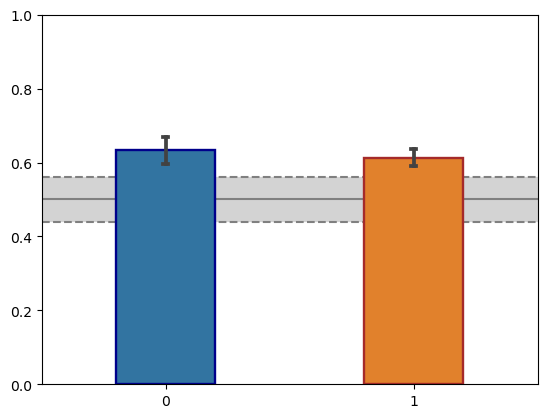

7.216177829149283e-05
0.6337939698492462
2.3258656618555146e-06
0.6134663341645885


In [43]:
max_v = 560
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [CTRL_vs_BP,BP_vs_CTRL], zorder = 1, capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
#plt.savefig('SVM_CTRL_vs_BP.jpg', dpi = 1800)
plt.show()

CTRL_vs_BP = CTRL_vs_BP[~np.isnan(CTRL_vs_BP)]
data = CTRL_vs_BP  
null_value = 0.557  
ttest, p_value = test_mean(data, null_value)
print(p_value)
print(np.mean(CTRL_vs_BP))

data = BP_vs_CTRL  
null_value = 0.557  
ttest, p_value = test_mean(data, null_value)
print(p_value)

print(np.mean(BP_vs_CTRL))

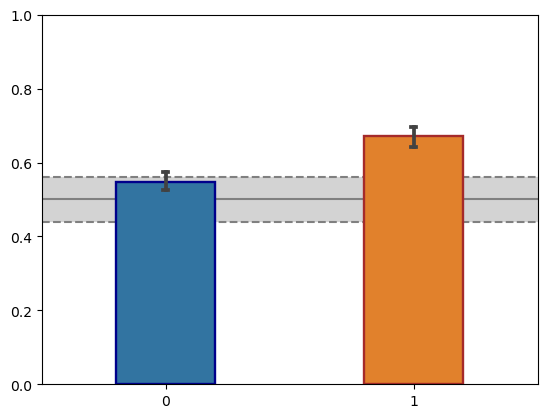

0.4833284723527239
1.5288826668057715e-15
0.670625


In [44]:
max_v = 560
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [CTRL_vs_SCZ,SCZ_vs_CTRL], zorder = 1 ,capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
#plt.savefig('SVM_CTRL_vs_SCZ.jpg', dpi = 1800)
plt.show()

data = CTRL_vs_SCZ  
null_value = 0.557  
ttest, p_value = test_mean(data, null_value)
print(p_value)

SCZ_vs_CTRL = SCZ_vs_CTRL[~np.isnan(SCZ_vs_CTRL)]
data = SCZ_vs_CTRL  
null_value = 0.557  
ttest, p_value = test_mean(data, null_value)
print(p_value)

print(np.mean(SCZ_vs_CTRL))

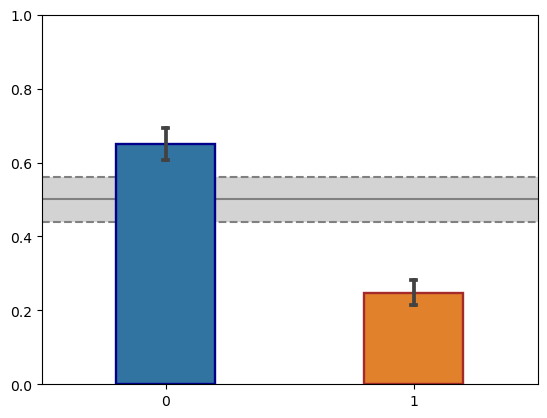

3.368111343845256e-05
1.3003089649557088e-27
0.6491666666666667
0.24573643410852714


In [45]:
max_v = 560
y = np.array(range(500, max_v, 1))/1000
sns.barplot(data = [CTRL_vs_ADHD,ADHD_vs_CTRL], zorder = 1 ,capsize = 0.02, width = 0.4, edgecolor = ['darkblue', 'brown'], linewidth = 1.7)
for e in y:
    plt.axhline(e, c = 'lightgrey', zorder= 0.1)
    plt.axhline(1-e, c = 'lightgrey', zorder= 0.1)
plt.axhline(0.5, c = 'grey', zorder= 0.5)
plt.axhline(max_v/1000, c = 'grey', zorder= 0.5, linestyle = '--')
plt.axhline(1-(max_v/1000), c = 'grey', zorder= 0.5, linestyle = '--')
plt.ylim(0,1)
#plt.savefig('SVM_CTRL_vs_ADHD.jpg', dpi = 1800)
plt.show()

CTRL_vs_ADHD = CTRL_vs_ADHD[~np.isnan(CTRL_vs_ADHD)]
data = CTRL_vs_ADHD  
null_value = 0.557  
ttest, p_value = test_mean(data, null_value)
print(p_value)


data = ADHD_vs_CTRL  
null_value = 0.463  
ttest, p_value = test_mean(data, null_value)
print(p_value)

print(np.mean(CTRL_vs_ADHD))
print(np.mean(ADHD_vs_CTRL))

In [46]:
RF_cm = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/Random Forest/RF_cm.npy') 


SVM_cm = np.load('C:/Users/javie/Desktop/Trabajo/Master/TFM/Data_analysis/Results Classification/SVM/SVM_cm.npy') 


In [47]:
RF_mean = np.sum(RF_cm, axis = 0)

RF_final = np.zeros((4,4))
for i in range(0,4):
    for j in range(0,4):
        RF_final[i][j] = RF_mean[i][j]/np.sum(RF_mean[i])
        
RF_final

array([[0.4696875, 0.1715625, 0.12875  , 0.23     ],
       [0.0644   , 0.7954   , 0.0796   , 0.0606   ],
       [0.05     , 0.103    , 0.768    , 0.079    ],
       [0.0715   , 0.0505   , 0.0475   , 0.8305   ]])

In [48]:
SVM_mean = np.sum(SVM_cm, axis = 0)

SVM_final = np.zeros((4,4))
for i in range(0,4):
    for j in range(0,4):
        SVM_final[i][j] = SVM_mean[i][j]/np.sum(SVM_mean[i])
        
SVM_final

array([[0.43328197, 0.17072419, 0.1577812 , 0.23821263],
       [0.0672    , 0.7642    , 0.1       , 0.0686    ],
       [0.06282723, 0.14031414, 0.69528796, 0.10157068],
       [0.12325   , 0.06375   , 0.08675   , 0.72625   ]])

<AxesSubplot: >

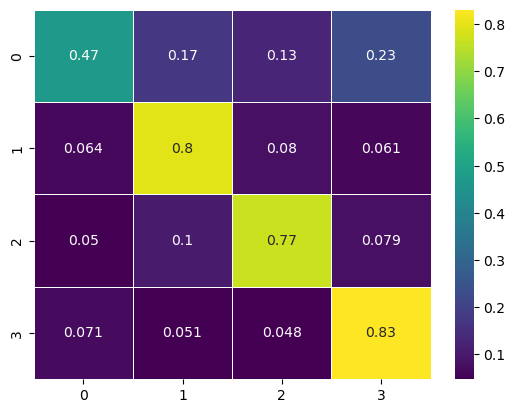

In [49]:
sns.heatmap(RF_final, cmap = 'viridis', annot = True, vmax=np.max(RF_final),
           vmin=np.min(RF_final), linewidths = 0.5)
#plt.savefig('RF_cm', dpi = 1800)

In [50]:
from scipy.stats import chisquare

def test_classification(observed_frequencies, expected_probabilities):
    """
    Perform a chi-squared goodness-of-fit test to test the significance of classification.

    Parameters:
    observed_frequencies (array-like): The observed frequencies of each option.
    expected_probabilities (array-like): The expected probabilities of each option.

    Returns:
    tuple: The test statistic and the p-value.
    """
    # Calculate the total observed frequency
    total_observed = sum(observed_frequencies)

    # Calculate the expected frequencies based on the overall expected probability
    expected_frequencies = [total_observed * p for p in expected_probabilities]

    # Perform the chi-squared goodness-of-fit test
    test_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

    return test_statistic, p_value

# Example usage
observed_frequencies = [470, 170, 130, 230]  # Observed frequencies of each option
expected_probabilities = [0.25, 0.25, 0.25, 0.25]  # Expected probabilities of each option

test_statistic, p_value = test_classification(observed_frequencies, expected_probabilities)

print(test_statistic)
print(p_value)



278.40000000000003
4.699313760543273e-60


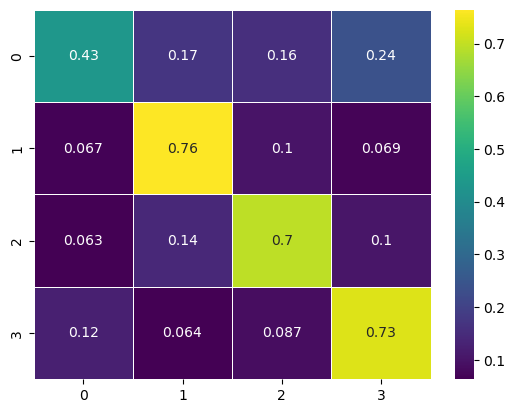

In [52]:
sns.heatmap(SVM_final, cmap = 'viridis', annot = True, vmax=np.max(SVM_final),
           vmin=np.min(SVM_final), linewidths = 0.5)
plt.savefig('SVM_cm', dpi = 1800)